In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

Let's first filter the tags that have been detected in at least 1% of the episodes on average

In [2]:
# Load the file
file_path = './indices_friends_av - annotations.csv'
data = pd.read_csv(file_path, sep=',', index_col='name')
data.head()

,friends_s01e01a,friends_s01e01b,friends_s01e02a,friends_s01e02b,friends_s01e03a,friends_s01e03b,friends_s01e04a,friends_s01e04b,friends_s01e05a,friends_s01e05b,...,friends_s04e20a,friends_s04e20b,friends_s04e21a,friends_s04e21b,friends_s04e22a,friends_s04e22b,friends_s04e23a,friends_s04e23b,friends_s04e23c,friends_s04e23d
name,,,,,,,,,,,,,,,,,,,,,
tag_Talking,0.822701,0.788294,0.827751,0.814523,0.835618,0.820093,0.852770,0.844376,0.856719,0.835099,...,0.802964,0.804888,0.757950,0.801118,0.809038,0.785322,0.756425,0.798401,0.820800,0.673498
tag_Music,0.136962,0.105562,0.130571,0.152593,0.102641,0.101281,0.144810,0.198564,0.139894,0.133582,...,0.118059,0.118273,0.122970,0.225747,0.097123,0.179036,0.214065,0.144787,0.252292,0.405912
tag_laugh,0.119371,0.108546,0.123001,0.127359,0.122702,0.130645,0.124500,0.130696,0.144293,0.134053,...,0.151326,0.161389,0.101008,0.107695,0.136214,0.109194,0.096701,0.119908,0.133445,0.084412
tag_woman_speak,0.136903,0.101277,0.123644,0.139069,0.158467,0.123891,0.108796,0.096603,0.125315,0.099060,...,0.063087,0.080724,0.050099,0.073890,0.075378,0.076208,0.057639,0.084688,0.105032,0.055484
tag_man_speak,0.074801,0.064188,0.080273,0.070101,0.043777,0.064339,0.068906,0.063070,0.074078,0.083730,...,0.046672,0.047030,0.045698,0.045556,0.052519,0.040891,0.023109,0.031195,0.066872,0.051952


In [3]:
# Filtering the rows where the 'model', 'subject', and 'conv' columns have NaN values
# and the 'name' column starts with 'tag_'
filtered_data = data.loc[data.index.str.startswith('tag_')]

# Calculating the average score for the filtered data using only numeric columns
average_scores_filtered = filtered_data.mean(axis=1)

# Adding the average scores to the filtered dataframe using .loc
filtered_data.loc[:, 'average_score'] = average_scores_filtered

# Sorting the tags by the average score in descending order
sorted_filtered_data = filtered_data.sort_values(by='average_score', ascending=False)

# Extracting the list of tags where the average score is at least 0.01
tags = sorted_filtered_data.loc[sorted_filtered_data['average_score'] >= 0.01].index

# Display the top sorted tags
print(tags)

Index(['tag_Talking', 'tag_Music', 'tag_laugh', 'tag_woman_speak',
       'tag_man_speak', 'tag_Kitchen_sounds', 'tag_Applause', 'tag_Car'],
      dtype='object', name='name')


/tmp/ipykernel_145336/1937642087.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'average_score'] = average_scores_filtered


define a series of dictionaries to loop through relevant model parameters

In [4]:
list_model = []
for model in ['STG', 'wholebrain']:
    for sub in ['sub01', 'sub02', 'sub03', 'sub04', 'sub05', 'sub06']:
        for conv in ['conv4', 'baseline']:
            list_model.append(f"r2_{model}_{sub}_{conv}")
            

In [13]:
print(tags[3])
y = data.loc[tags[0]].T
x= data.loc[['s02', 's03', 's04']].T
x = sm.add_constant(x)
x, y

tag_woman_speak


(                 const  s02  s03  s04
 friends_s01e01a    1.0  0.0  0.0  0.0
 friends_s01e01b    1.0  0.0  0.0  0.0
 friends_s01e02a    1.0  0.0  0.0  0.0
 friends_s01e02b    1.0  0.0  0.0  0.0
 friends_s01e03a    1.0  0.0  0.0  0.0
 ...                ...  ...  ...  ...
 friends_s04e22b    1.0  0.0  0.0  1.0
 friends_s04e23a    1.0  0.0  0.0  1.0
 friends_s04e23b    1.0  0.0  0.0  1.0
 friends_s04e23c    1.0  0.0  0.0  1.0
 friends_s04e23d    1.0  0.0  0.0  1.0
 
 [194 rows x 4 columns],
 friends_s01e01a    0.822701
 friends_s01e01b    0.788294
 friends_s01e02a    0.827751
 friends_s01e02b    0.814523
 friends_s01e03a    0.835618
                      ...   
 friends_s04e22b    0.785322
 friends_s04e23a    0.756425
 friends_s04e23b    0.798401
 friends_s04e23c    0.820800
 friends_s04e23d    0.673498
 Name: tag_Talking, Length: 194, dtype: float64)

In [14]:
model = sm.OLS(y,x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tag_Talking   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.029
Date:                Tue, 27 Aug 2024   Prob (F-statistic):              0.111
Time:                        16:57:16   Log-Likelihood:                 411.21
No. Observations:                 194   AIC:                            -814.4
Df Residuals:                     190   BIC:                            -801.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8232      0.004    194.257      0.000       0.815       0.832
s02           -0.0141      0.006     -2.350      0.020      -0.026      -0.002
s03           -0.0041      0.006     -0.685      0.494      -0.016       0.008
s04           -0.0083      0.006     -1.392      0.165      -0.020       0.003
==============================================================================
Omnibus:                      117.041   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              732.119
Skew:                          -2.306   Prob(JB):                    1.05e-159
Kurtosis:                      11.324   Cond. No.                         4.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# statsmodel regression multivariee

In [15]:
y = data.loc[list_model[0]]
x = data.loc[tags].T
x = x - x.mean()
x = sm.add_constant(x)
x, y

(                 const  tag_Talking  tag_Music  tag_laugh  tag_woman_speak  \
 friends_s01e01a    1.0     0.006121  -0.024689  -0.017678         0.049728   
 friends_s01e01b    1.0    -0.028286  -0.056089  -0.028503         0.014103   
 friends_s01e02a    1.0     0.011171  -0.031080  -0.014047         0.036469   
 friends_s01e02b    1.0    -0.002057  -0.009058  -0.009690         0.051894   
 friends_s01e03a    1.0     0.019038  -0.059009  -0.014347         0.071293   
 ...                ...          ...        ...        ...              ...   
 friends_s04e22b    1.0    -0.031258   0.017385  -0.027854        -0.010967   
 friends_s04e23a    1.0    -0.060155   0.052414  -0.040347        -0.029536   
 friends_s04e23b    1.0    -0.018179  -0.016863  -0.017140        -0.002487   
 friends_s04e23c    1.0     0.004220   0.090641  -0.003604         0.017857   
 friends_s04e23d    1.0    -0.143082   0.244261  -0.052637        -0.031691   
 
                  tag_man_speak  tag_Kitchen_sound

In [16]:
model = sm.OLS(y,x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     r2_STG_sub01_conv4   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.6147
Date:                Tue, 27 Aug 2024   Prob (F-statistic):              0.765
Time:                        17:02:58   Log-Likelihood:                 229.97
No. Observations:                 191   AIC:                            -441.9
Df Residuals:                     182   BIC:                            -412.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4071      0.005     75.621      0.000       0.396       0.418
tag_Talking            0.3099      0.224      1.381      0.169      -0.133       0.753
tag_Music              0.0097      0.106      0.092      0.927      -0.199       0.219
tag_laugh             -0.0223      0.349     -0.064      0.949      -0.711       0.666
tag_woman_speak        0.0835      0.304      0.275      0.784      -0.516       0.683
tag_man_speak         -0.1058      0.495     -0.214      0.831      -1.082       0.870
tag_Kitchen_sounds     0.2510      0.610      0.411      0.681      -0.953       1.454
tag_Applause           1.0161      0.594      1.710      0.089      -0.156       2.188
tag_Car                0.1898      0.810      0.234      0.815      -1.408       1.787
==============================================================================
Omnibus:                       72.352   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.058
Skew:                           1.216   Prob(JB):                    5.28e-113
Kurtosis:                      10.685   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r2_STG_sub01_conv4


<Axes: >

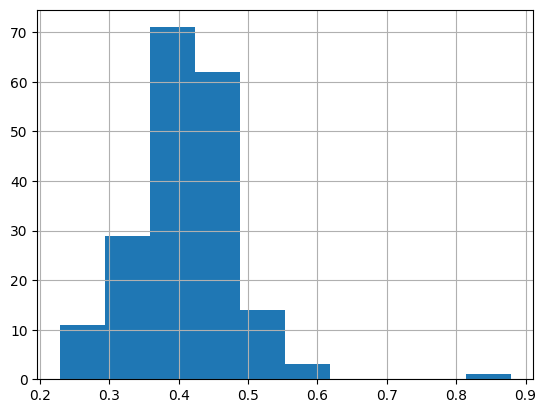

In [9]:
print(list_model[0])
y.hist()

In [10]:
# Manual test of tag "music"
# this can be useful to append multiple p-values across several models in a loop
# and then apply a FDR correction on the p values
results.params
results.t_test([1, 0, 0, 0, 0, 0, 0, 0, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1289      0.176      0.734      0.464      -0.218       0.475